In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os
import pandas as pd
from scipy.io import arff

from autogluon.tabular import TabularPredictor, TabularDataset



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import pandas as pd

# Path to the directory containing your CSV files
directory_path = '/home/danish/Datasets/ICS/triple'
# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path).dropna()
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df # .sample(frac=0.5, random_state=42)
data.shape
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

(78377, 129)

In [3]:
# List of bad or constant columns 
columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# Remove specified columns
data = data.drop(columns=columns_to_drop)



In [4]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:S,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log3,snort_log4,marker
0,129.047284,133139.0637,9.069922,133113.9904,-110.907440,133214.2835,129.522839,477.18466,4.262806,509.59513,...,0.0,0,0,0,0,0,0,0,0,NoEvents
1,128.949881,133063.8439,8.978249,133013.6974,-111.016302,133088.9172,129.368141,477.91710,4.125296,510.32757,...,0.0,0,0,0,0,0,0,0,0,NoEvents
2,128.222225,132336.7191,8.262051,132286.5725,-111.749688,132386.8656,128.382653,482.12863,3.265859,512.70800,...,0.0,0,0,0,0,0,0,0,0,NoEvents
3,123.850557,129202.5603,3.867465,129152.4138,-116.132816,129277.7801,121.965526,505.74982,-1.249048,525.52570,...,0.0,0,0,0,0,0,0,0,0,NoEvents
4,128.594648,132236.4260,8.623015,132186.2794,-111.354348,132261.4993,132.364710,276.86232,8.829280,289.13069,...,0.0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,35.603597,132286.5725,-84.373765,132236.4260,155.626796,132361.7923,39.998184,249.76204,-81.073528,251.77625,...,0.0,0,0,0,0,0,0,0,0,Natural
78373,35.374414,132336.7191,-84.602948,132286.5725,155.397613,132411.9389,38.462657,253.60735,-82.081934,253.79046,...,0.0,0,0,0,0,0,0,0,0,Natural
78374,35.368685,132336.7191,-84.608678,132286.5725,155.391884,132411.9389,38.508493,253.60735,-82.139230,254.15668,...,0.0,0,0,0,0,0,0,0,0,Natural
78375,35.305659,132336.7191,-84.665973,132286.5725,155.334588,132411.9389,38.244933,253.60735,-82.374142,254.33979,...,0.0,0,0,0,0,0,0,0,0,Natural


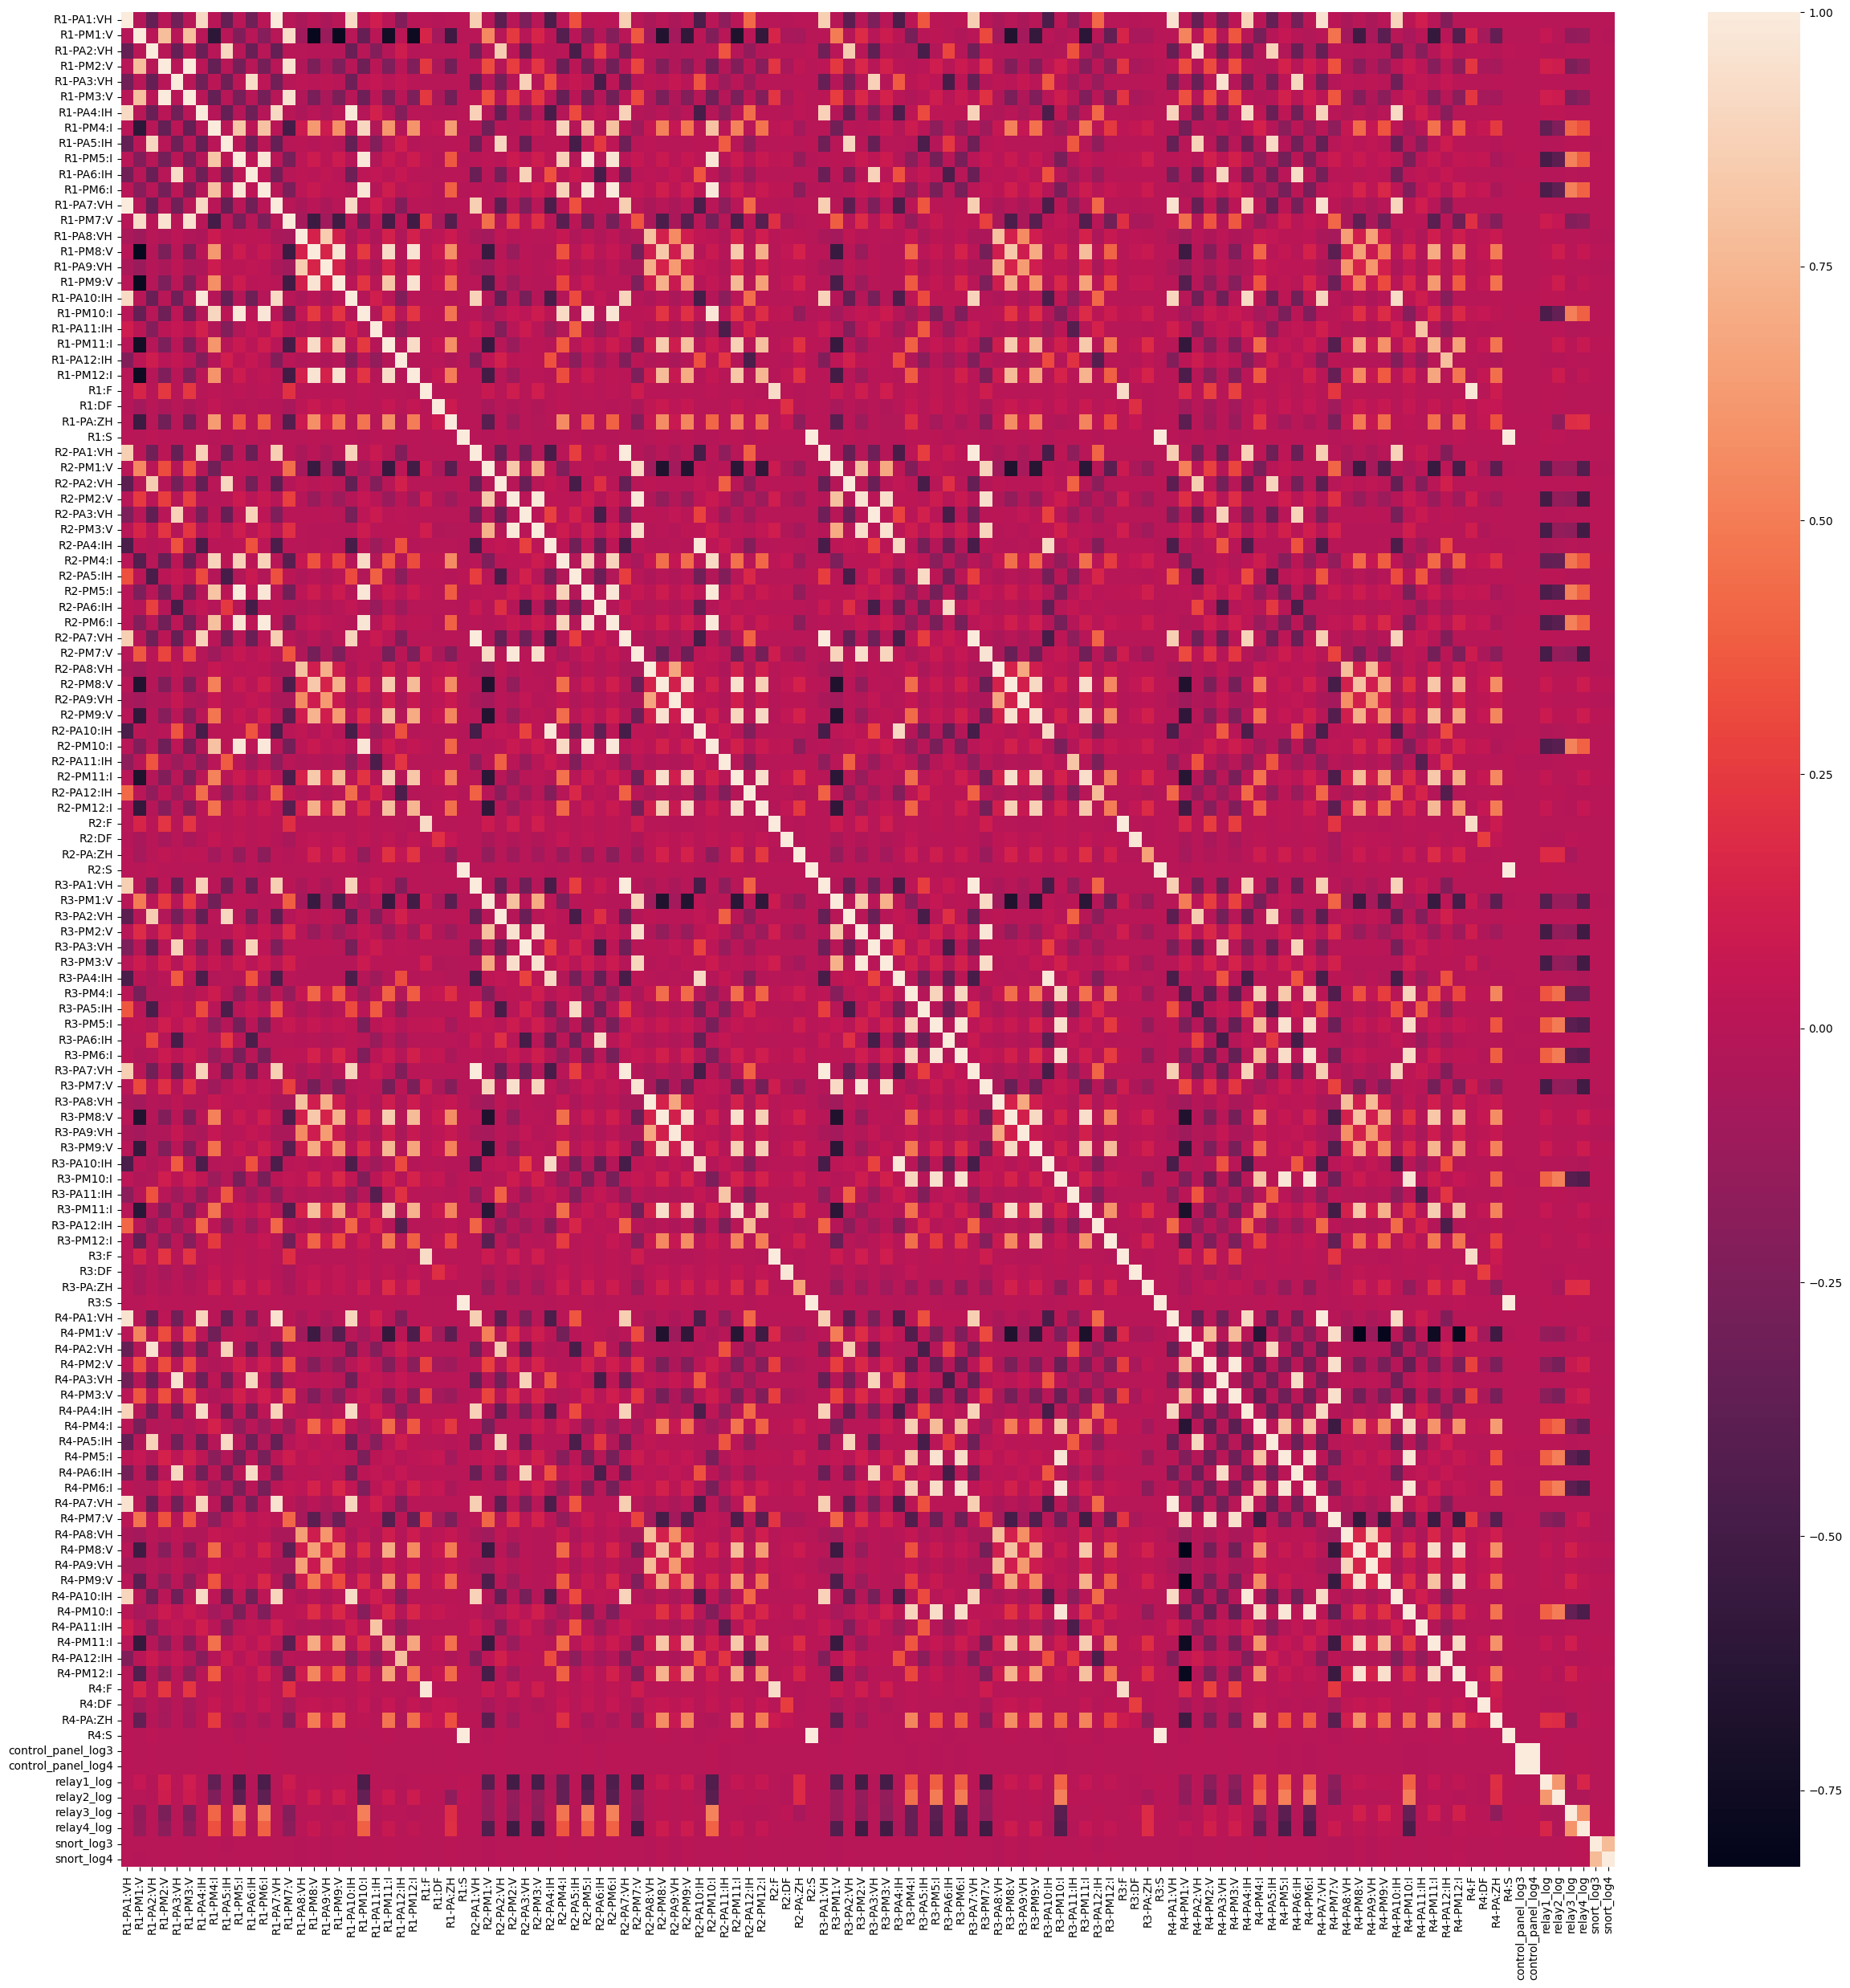

In [5]:

corr = pd.DataFrame(data.drop('marker', axis=1)).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

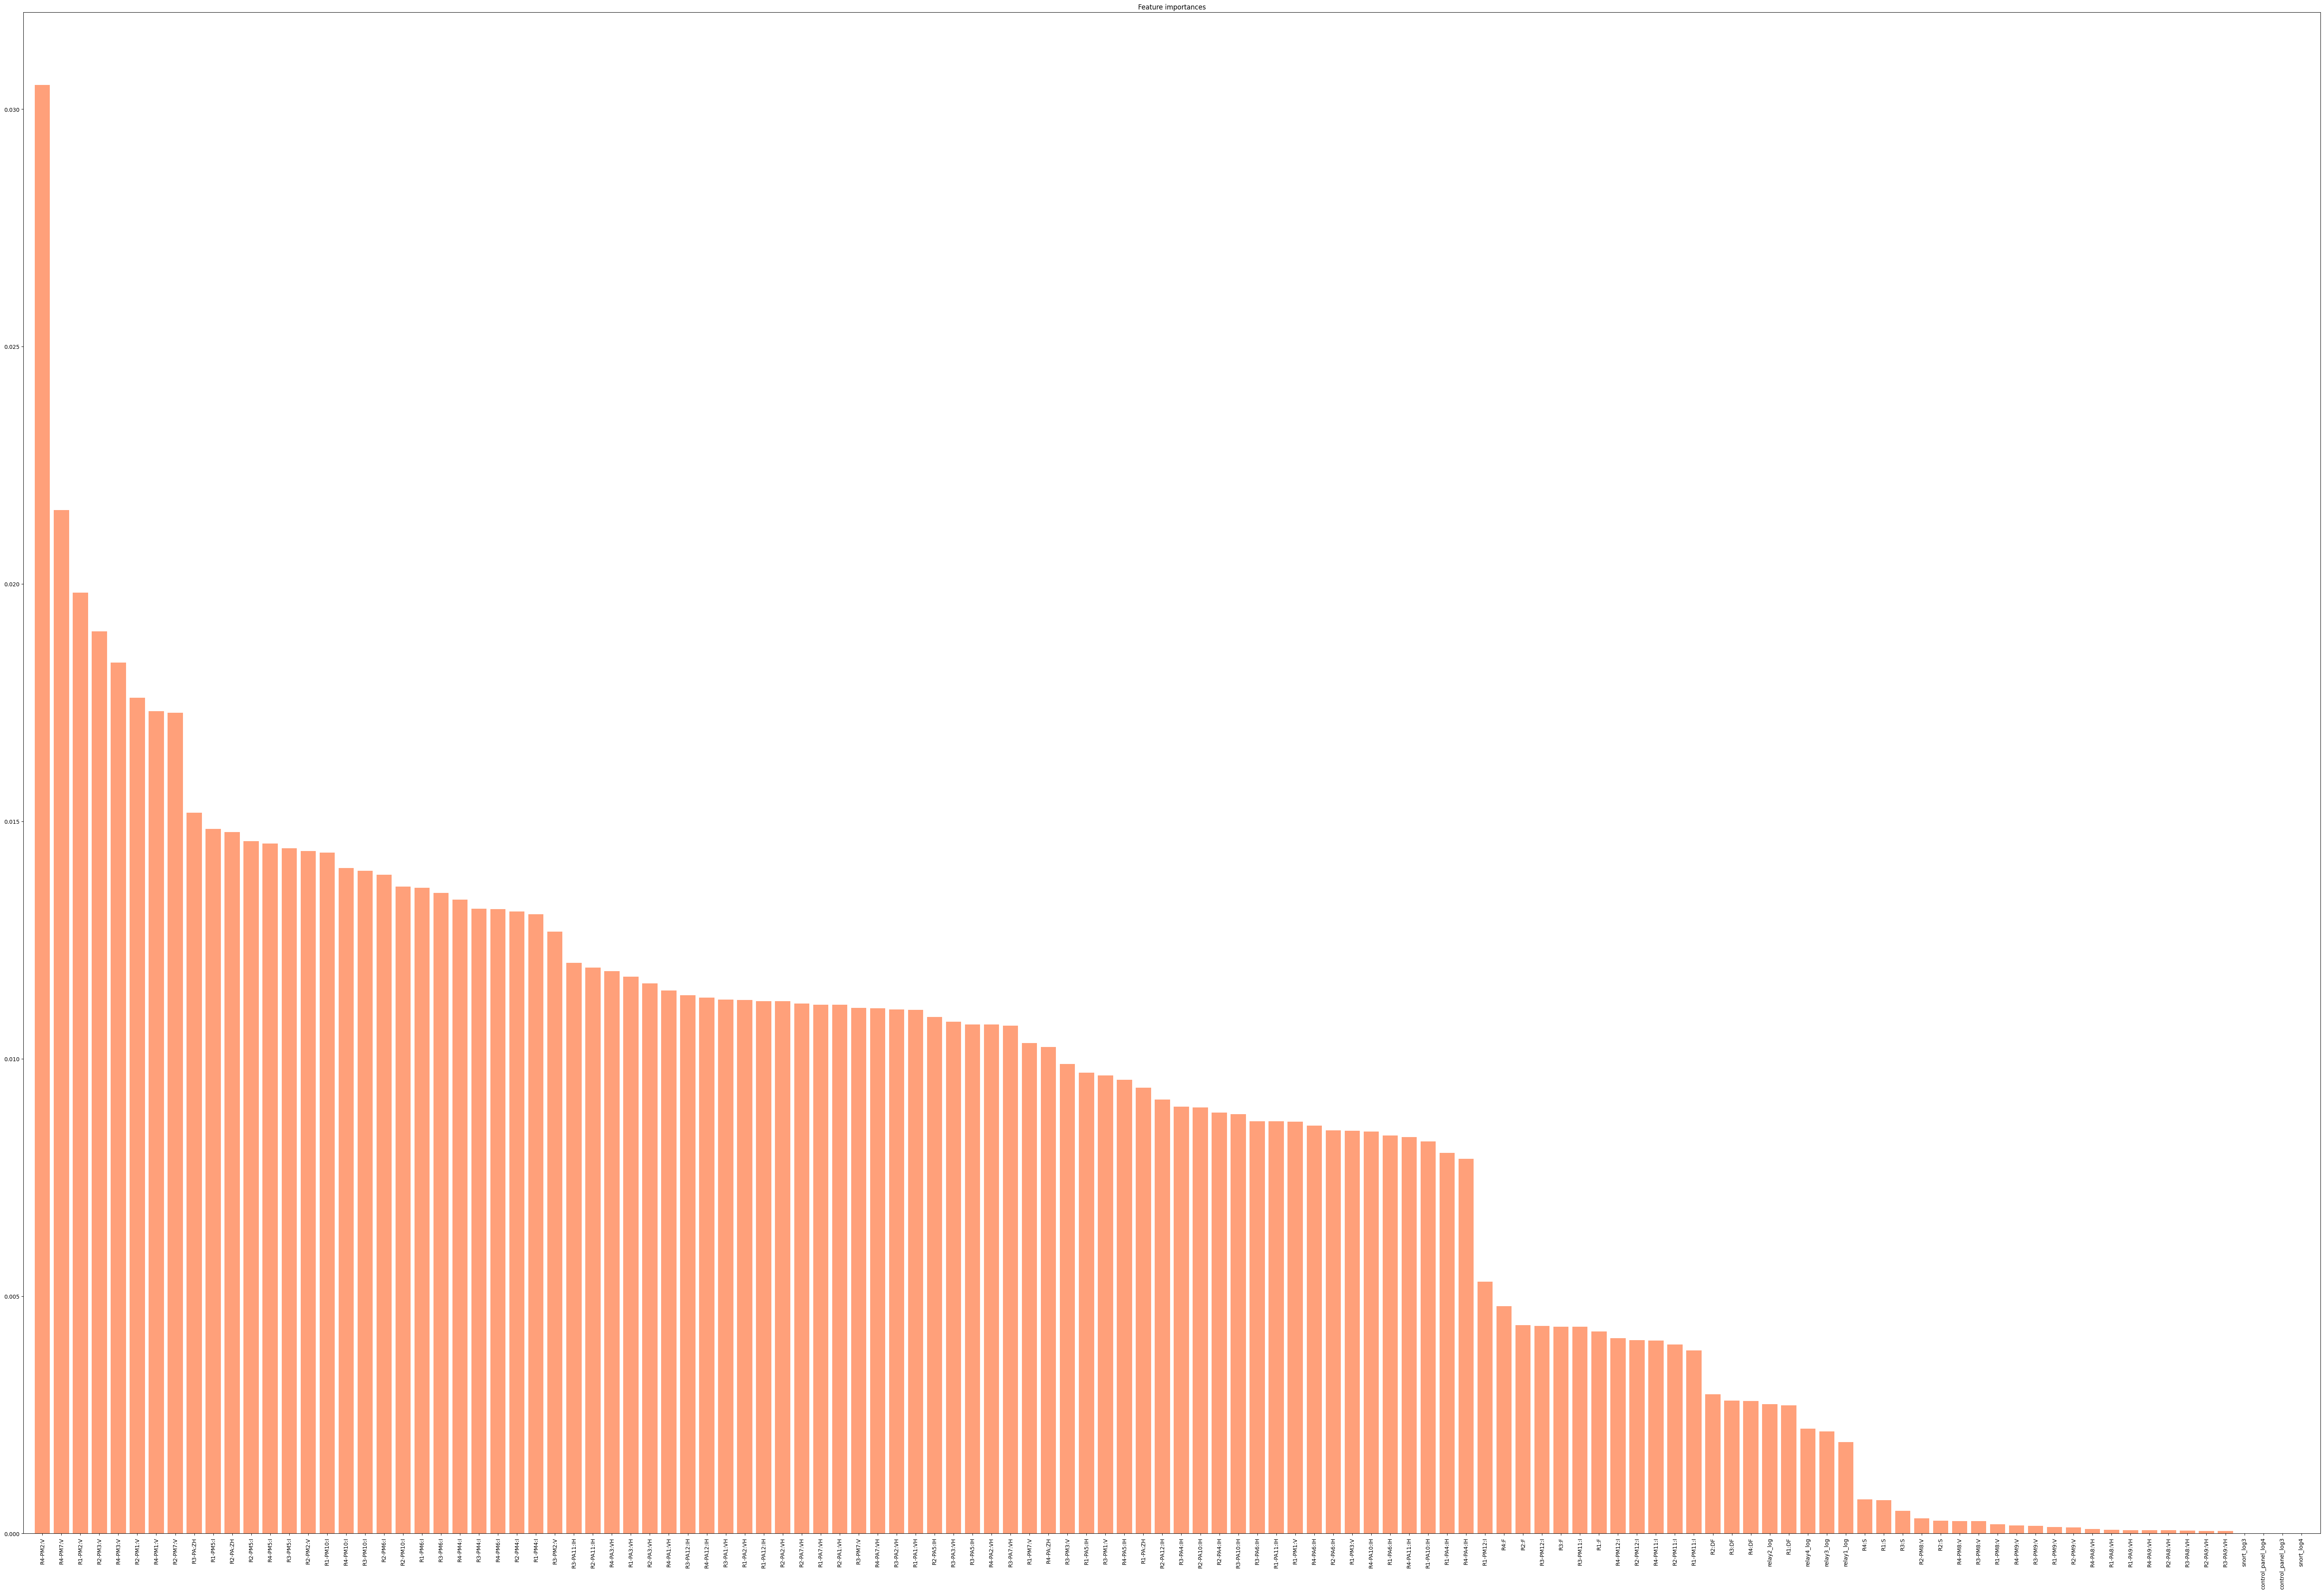

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('marker', axis=1), data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
plt.show()

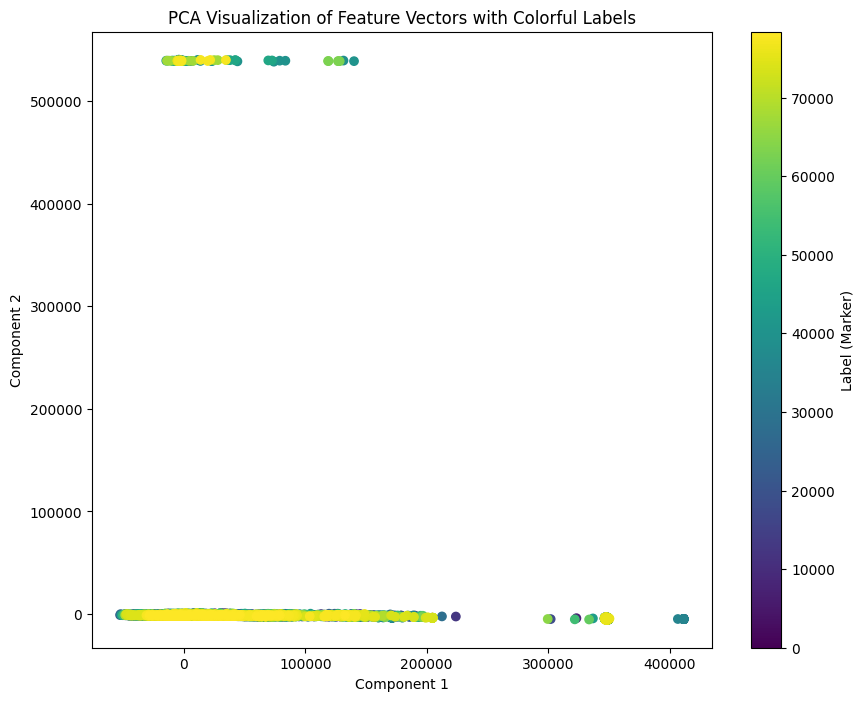

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


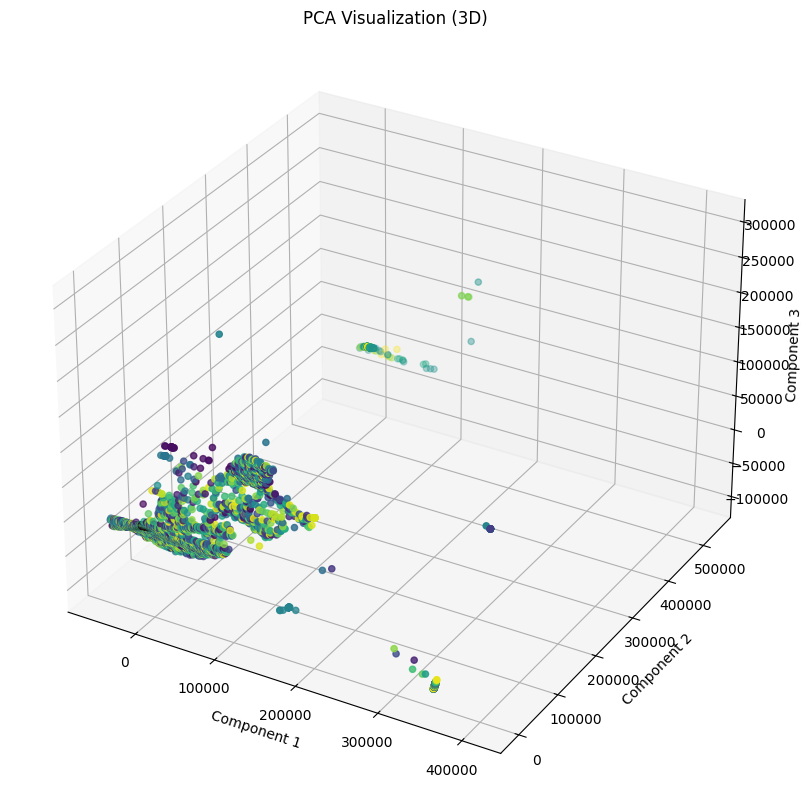

In [8]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [9]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('marker', axis=1), data['marker'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('marker', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(78377, 73)


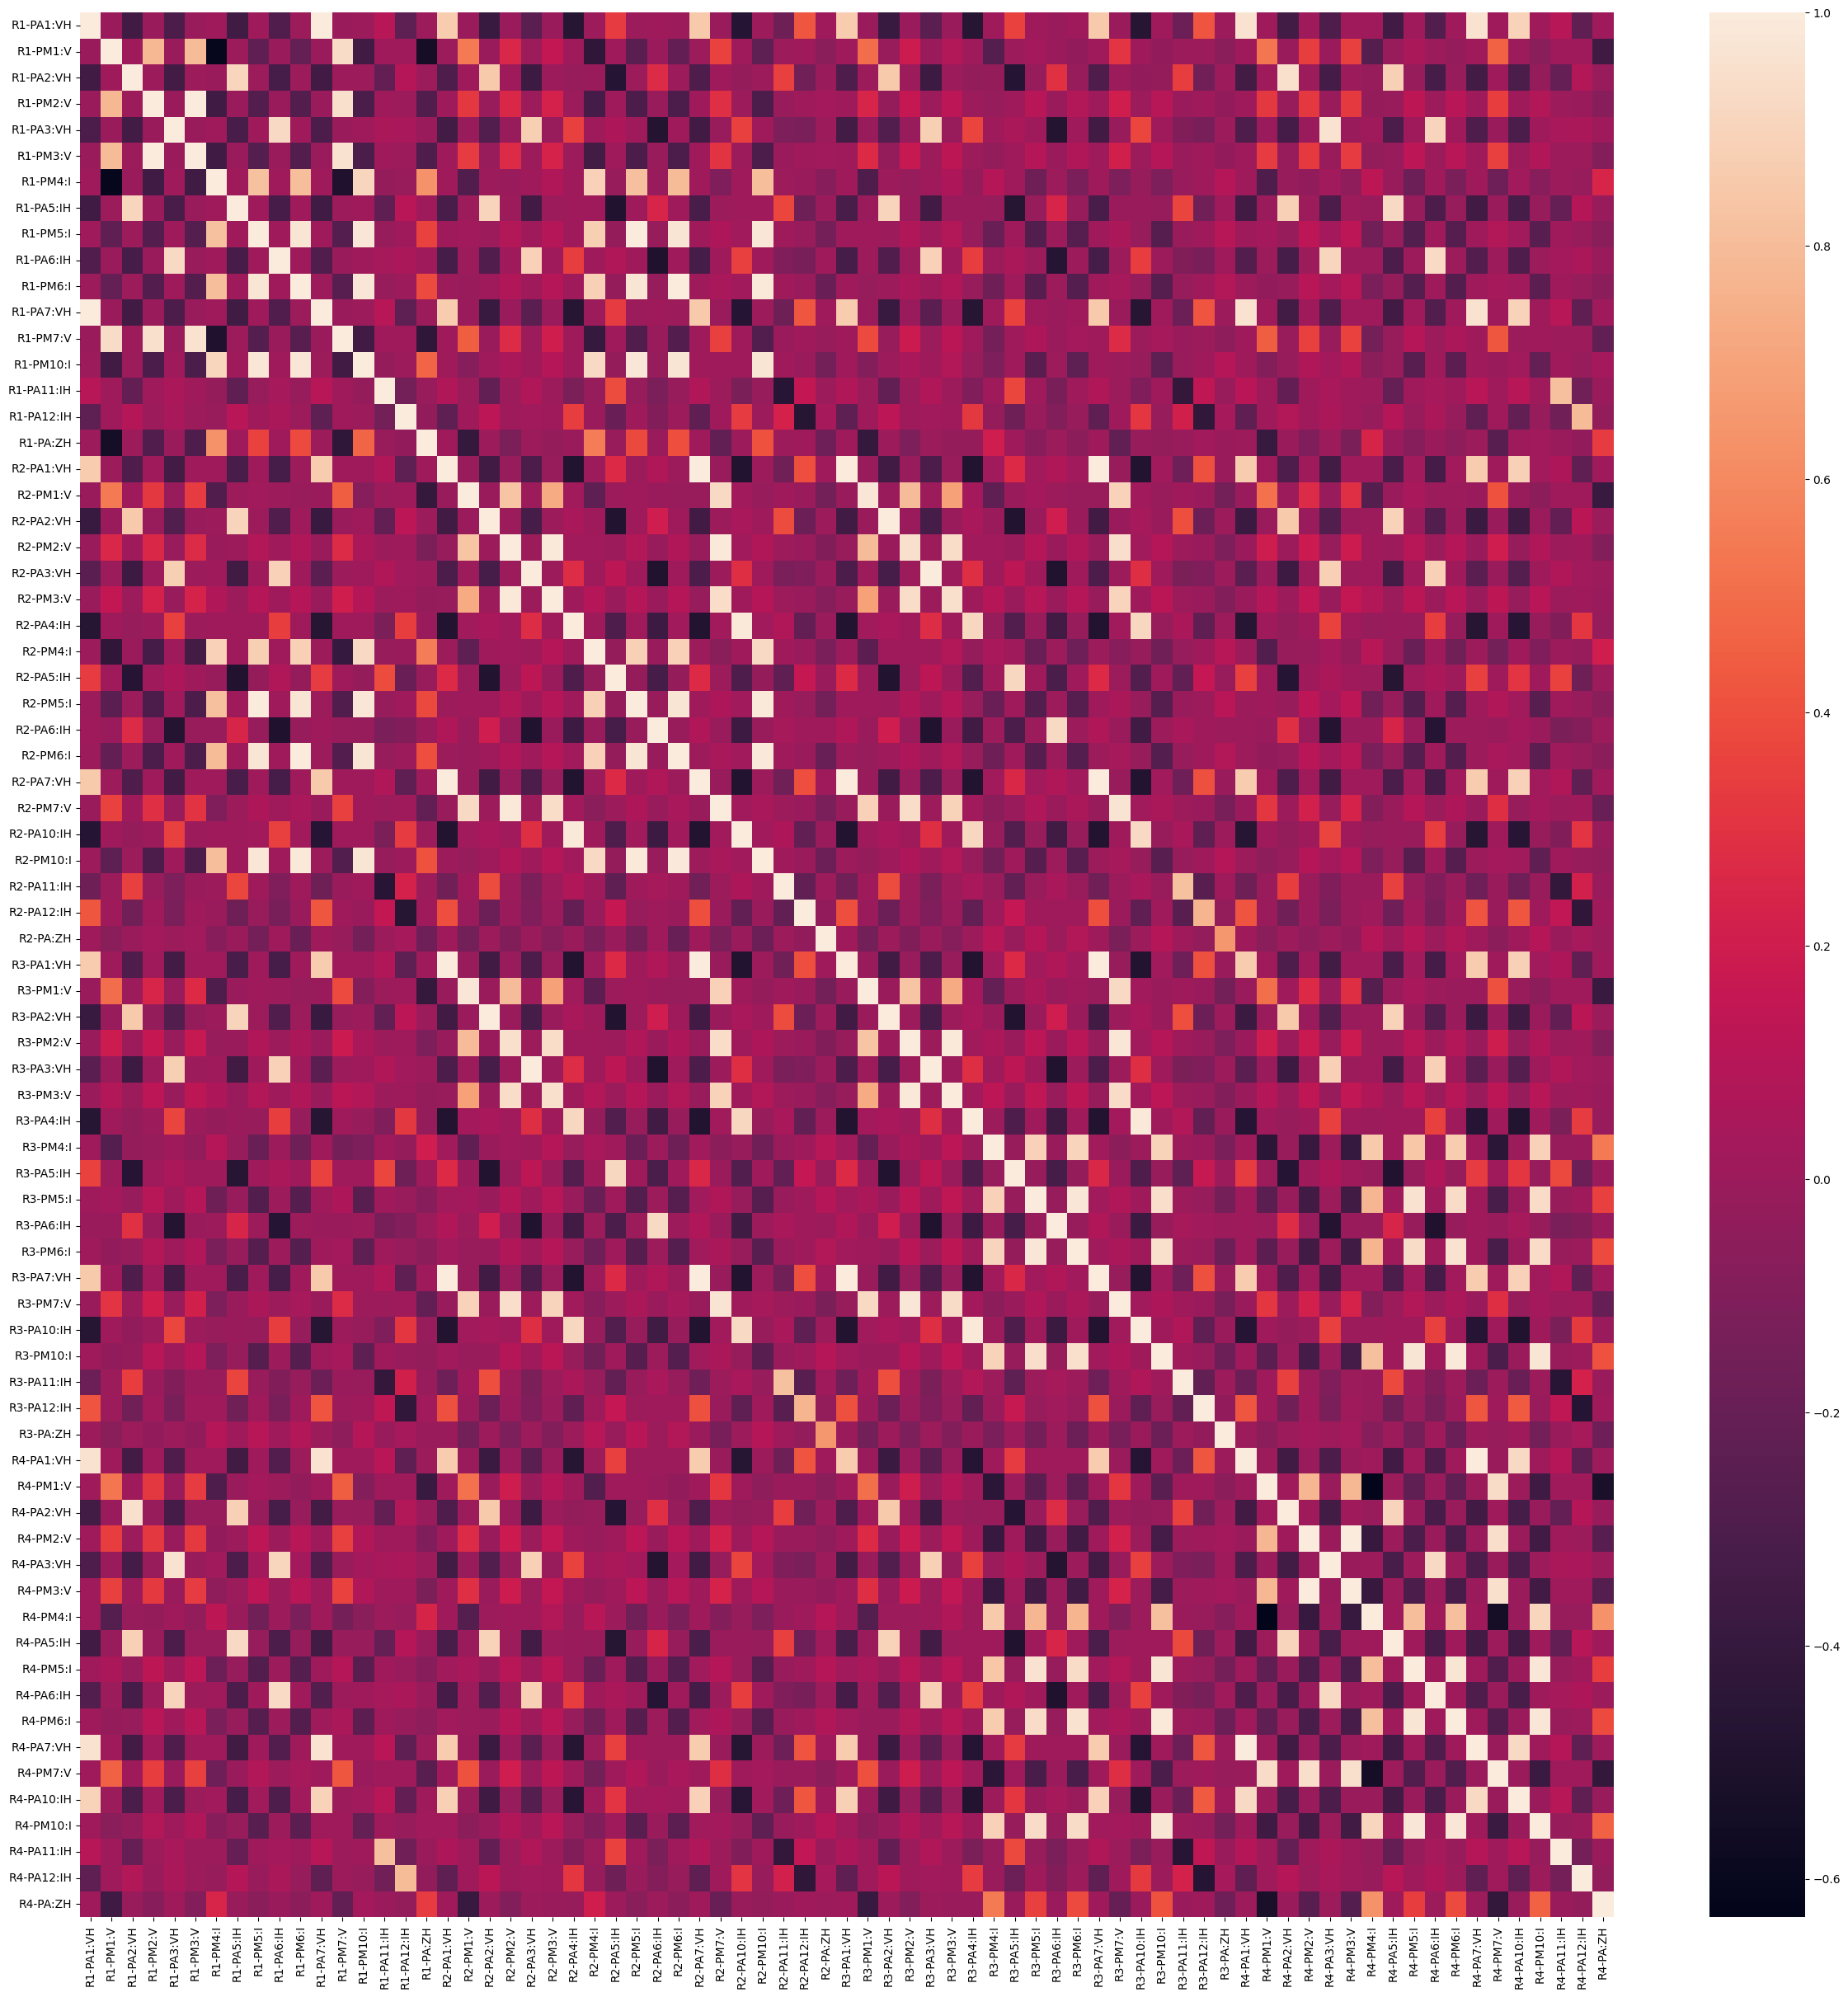

In [10]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

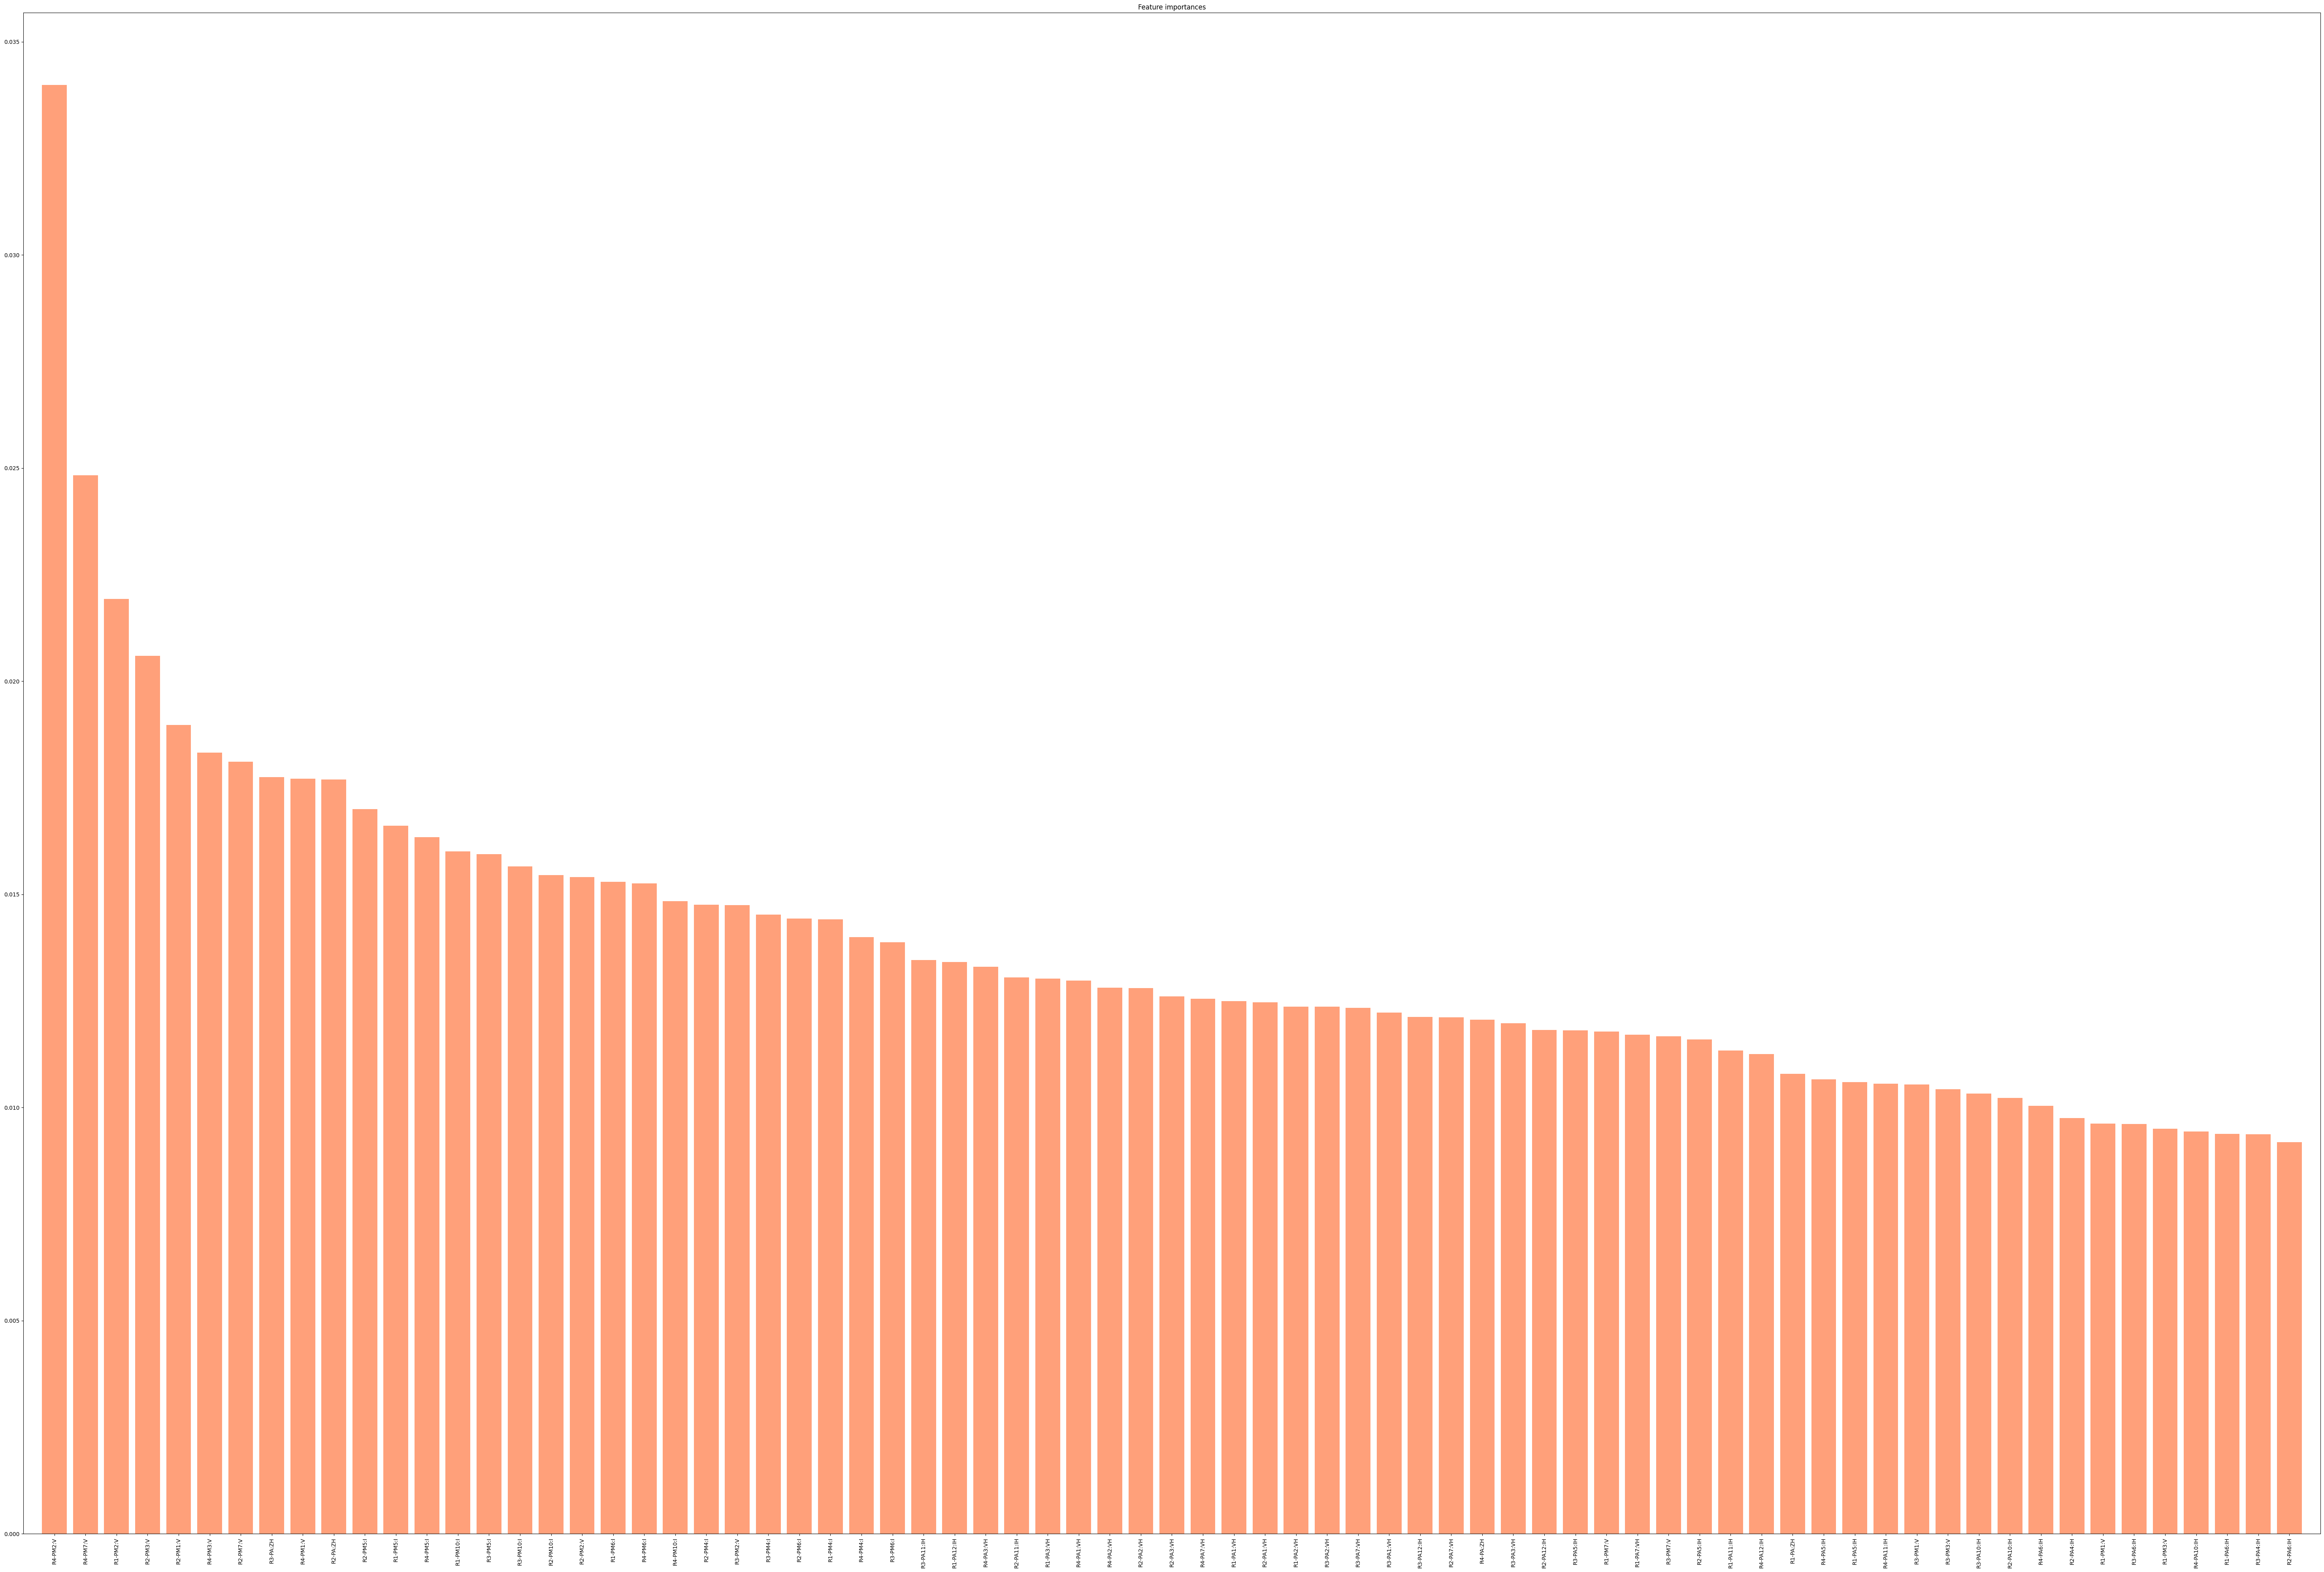

In [11]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [12]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,...,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PA12:IH,R4-PA:ZH
0,0.937098,1.288889,0.004594,1.521739,-0.803109,1.288889,0.652913,0.012042,0.850801,-0.785585,...,0.847531,-0.783123,0.638573,0.937857,0.944305,0.921097,0.705841,-173.170764,-5.144086,-0.476957
1,0.936520,1.222222,0.004151,1.434783,-0.803813,1.177778,0.657767,0.011345,0.855734,-0.786550,...,0.853717,-0.784197,0.641020,0.937279,0.860367,0.920260,0.709525,-172.987417,-5.103226,-0.458196
2,0.932202,0.577778,0.000692,0.804348,-0.808551,0.555555,0.685680,0.006993,0.871763,-0.793349,...,0.872276,-0.790412,0.664263,0.932956,0.251815,0.914609,0.731631,-174.895367,-5.288889,-0.419051
3,0.906260,-2.200000,-0.020535,-1.913043,-0.836868,-2.200000,0.842233,-0.015872,0.958076,-0.837537,...,0.947750,-0.834571,0.824518,0.906849,-2.350271,0.879203,0.863039,177.210116,-5.934050,0.096545
4,0.934412,0.488889,0.002435,0.717391,-0.805997,0.444444,-0.674757,0.035167,-0.633785,-0.762177,...,-0.649568,-0.759912,-0.698516,0.935066,0.146892,0.943700,-0.683149,178.722725,-4.169176,-1.033886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.382578,0.533333,-0.446766,0.760870,0.918860,0.533333,-0.854369,-0.420120,-0.885327,1.015412,...,-0.878463,1.006485,-0.803722,0.382773,0.272799,0.377285,-0.850171,-154.543906,14.048746,-1.248345
78373,0.381218,0.577778,-0.447873,0.804348,0.917379,0.577778,-0.828883,-0.425226,-0.871763,1.010931,...,-0.869802,1.004145,-0.801275,0.381343,0.272799,0.372506,-0.841575,0.000000,0.000000,-0.954221
78374,0.381184,0.577778,-0.447901,0.804348,0.917342,0.577778,-0.828883,-0.425516,-0.869297,1.010815,...,-0.867327,1.003838,-0.801275,0.381309,0.272799,0.372576,-0.840346,0.000000,0.000000,-0.932723
78375,0.380810,0.577778,-0.448178,0.804348,0.916972,0.577778,-0.828883,-0.426706,-0.868064,1.009695,...,-0.866090,1.003339,-0.797605,0.380969,0.272799,0.371808,-0.839118,0.000000,0.000000,-0.894856


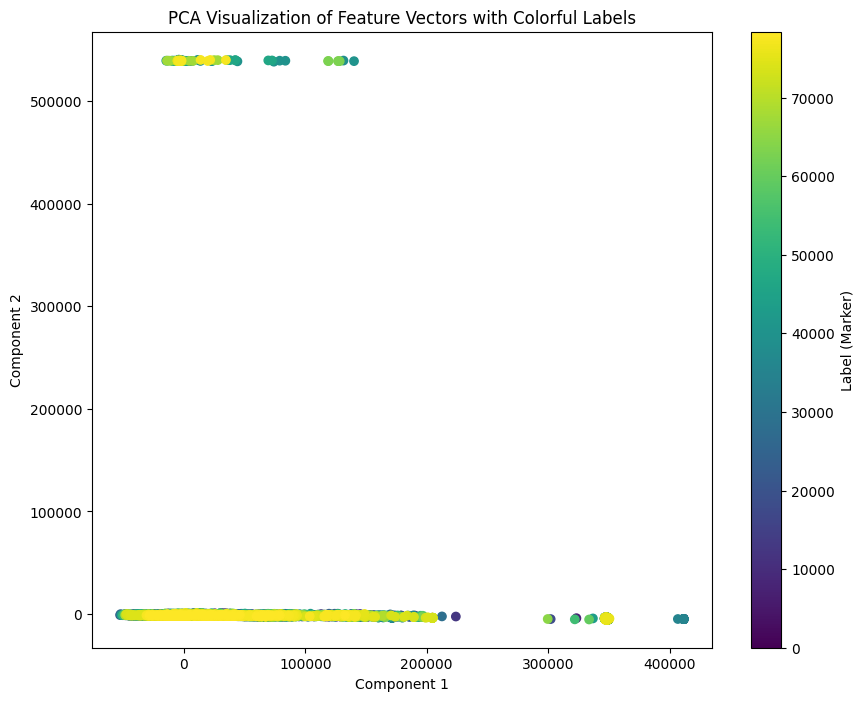

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


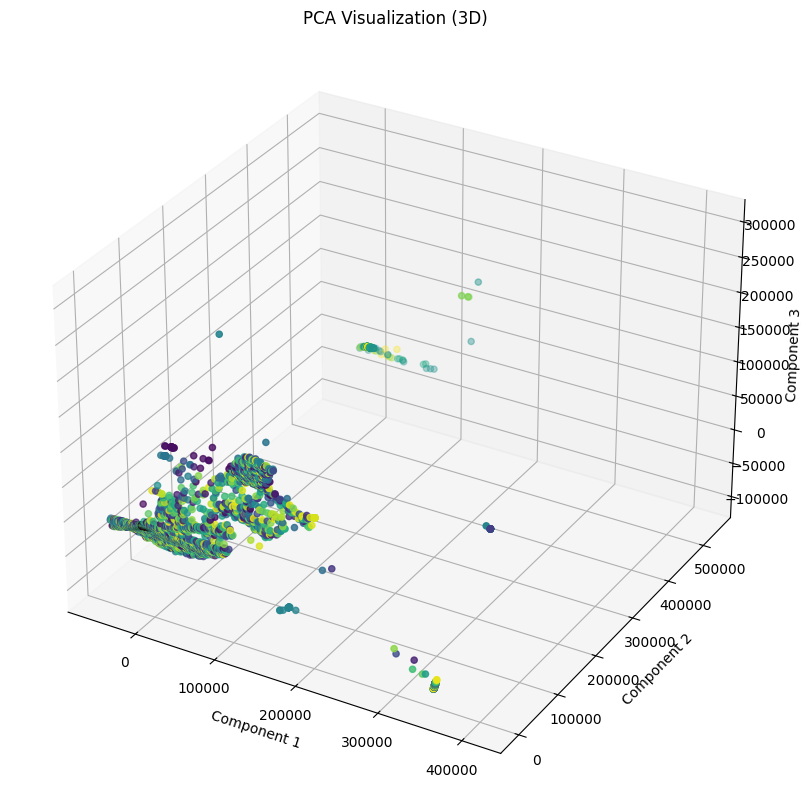

In [14]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [15]:
data = pd.concat((feature_vector_1,labels), axis=1)
data['marker'] = data['marker'].tolist()
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,...,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PA12:IH,R4-PA:ZH,marker
0,0.937098,1.288889,0.004594,1.521739,-0.803109,1.288889,0.652913,0.012042,0.850801,-0.785585,...,-0.783123,0.638573,0.937857,0.944305,0.921097,0.705841,-173.170764,-5.144086,-0.476957,NoEvents
1,0.936520,1.222222,0.004151,1.434783,-0.803813,1.177778,0.657767,0.011345,0.855734,-0.786550,...,-0.784197,0.641020,0.937279,0.860367,0.920260,0.709525,-172.987417,-5.103226,-0.458196,NoEvents
2,0.932202,0.577778,0.000692,0.804348,-0.808551,0.555555,0.685680,0.006993,0.871763,-0.793349,...,-0.790412,0.664263,0.932956,0.251815,0.914609,0.731631,-174.895367,-5.288889,-0.419051,NoEvents
3,0.906260,-2.200000,-0.020535,-1.913043,-0.836868,-2.200000,0.842233,-0.015872,0.958076,-0.837537,...,-0.834571,0.824518,0.906849,-2.350271,0.879203,0.863039,177.210116,-5.934050,0.096545,NoEvents
4,0.934412,0.488889,0.002435,0.717391,-0.805997,0.444444,-0.674757,0.035167,-0.633785,-0.762177,...,-0.759912,-0.698516,0.935066,0.146892,0.943700,-0.683149,178.722725,-4.169176,-1.033886,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,0.382578,0.533333,-0.446766,0.760870,0.918860,0.533333,-0.854369,-0.420120,-0.885327,1.015412,...,1.006485,-0.803722,0.382773,0.272799,0.377285,-0.850171,-154.543906,14.048746,-1.248345,Natural
78373,0.381218,0.577778,-0.447873,0.804348,0.917379,0.577778,-0.828883,-0.425226,-0.871763,1.010931,...,1.004145,-0.801275,0.381343,0.272799,0.372506,-0.841575,0.000000,0.000000,-0.954221,Natural
78374,0.381184,0.577778,-0.447901,0.804348,0.917342,0.577778,-0.828883,-0.425516,-0.869297,1.010815,...,1.003838,-0.801275,0.381309,0.272799,0.372576,-0.840346,0.000000,0.000000,-0.932723,Natural
78375,0.380810,0.577778,-0.448178,0.804348,0.916972,0.577778,-0.828883,-0.426706,-0.868064,1.009695,...,1.003339,-0.797605,0.380969,0.272799,0.371808,-0.839118,0.000000,0.000000,-0.894856,Natural


In [16]:
from sklearn.model_selection import train_test_split

data = TabularDataset(data)

# Define the target column name
target_column = 'marker'

# Split data into training and validation sets (e.g., 80% train, 20% validation)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)


In [17]:
val_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,...,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PA12:IH,R4-PA:ZH,marker
38854,0.662575,0.511111,-0.218913,0.760870,-1.102128,0.533333,-0.927184,-0.187123,-0.795314,-1.035227,...,-1.031771,-0.932170,0.663038,0.209846,0.689235,-0.891927,150.745196,-9.577061,-2.312862,Attack
74030,-0.022747,0.000000,-0.776797,-0.260870,0.477512,0.000000,0.091019,-0.796048,0.061652,0.524702,...,0.520070,0.103497,-0.024083,0.150901,-0.072472,0.081091,0.000000,0.000000,0.328988,Attack
60133,-0.268199,-0.200000,0.762544,0.065217,0.210402,-0.222222,-0.321602,0.837744,-0.318126,0.287265,...,0.263801,-0.261791,-0.267855,0.041969,-0.313241,-0.250855,-25.937799,14.919713,-0.166450,Attack
36602,0.839380,0.044444,-0.074890,0.304348,-0.909606,0.044444,-0.066748,-0.058583,-0.088779,-0.918730,...,-0.914295,-0.055049,0.840033,-0.251815,0.815648,-0.075236,0.000000,0.000000,0.245500,NoEvents
64691,-0.785760,-0.288889,0.341156,-0.021739,-0.353100,-0.266667,0.286408,0.377815,0.252774,-0.333462,...,-0.330419,0.274375,-0.784728,-0.036571,-0.849114,0.268757,0.000000,0.000000,0.532980,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,-0.679338,-1.688889,0.427753,-1.391304,-0.237165,-1.688889,-2.509709,-0.009546,-2.580764,-0.046390,...,-0.451950,2.636256,-0.821851,-7.323611,1.233396,2.647479,-126.394490,1.125448,2.502906,Attack
780,1.186495,3.222222,0.207650,3.391304,-0.531853,3.200000,-2.509709,-0.009546,-2.580764,-0.046390,...,-0.809672,2.739015,0.959778,5.162201,0.908993,2.742043,0.000000,0.000000,1.193860,Attack
16755,0.997144,0.288889,0.053414,0.000000,-0.737923,0.244444,-0.254854,0.080925,-0.290999,-0.734868,...,-0.731093,-0.242273,0.997039,0.431194,0.981946,-0.267644,0.000000,0.000000,0.066758,Attack
12431,-0.746829,0.422222,0.372928,0.652174,-0.310642,0.400000,-0.577670,0.428041,-0.583231,-0.270153,...,-0.266307,-0.548784,-0.745699,0.604647,-0.786275,-0.577004,0.000000,0.000000,-0.944008,Attack


In [18]:

# Initialize AutoGluon TabularPredictor
predictor = TabularPredictor(label=target_column, path='/home/danish/Codes/AutoML/Gluon2')  # Specify path to save models


In [19]:

# Train models using AutoGluon
predictor.fit(train_data=train_data, time_limit=3600)  # Set time_limit (in seconds) for training


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "/home/danish/Codes/AutoML/Gluon2"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.19
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #35~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue May  7 09:00:52 UTC 2
CPU Count:          128
Memory Avail:       463.59 GB

[1000]	valid_set's multi_error: 0.1488
[2000]	valid_set's multi_error: 0.116
[3000]	valid_set's multi_error: 0.0956
[4000]	valid_set's multi_error: 0.09
[5000]	valid_set's multi_error: 0.0812
[6000]	valid_set's multi_error: 0.0808
[7000]	valid_set's multi_error: 0.078
[8000]	valid_set's multi_error: 0.0748
[9000]	valid_set's multi_error: 0.0736
[10000]	valid_set's multi_error: 0.0708


	0.9292	 = Validation score   (accuracy)
	42.2s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 3525.52s of the 3525.51s of remaining time.


[1000]	valid_set's multi_error: 0.1064
[2000]	valid_set's multi_error: 0.0772
[3000]	valid_set's multi_error: 0.0692
[4000]	valid_set's multi_error: 0.0668
[5000]	valid_set's multi_error: 0.0676
[6000]	valid_set's multi_error: 0.0652
[7000]	valid_set's multi_error: 0.0648


	0.9364	 = Validation score   (accuracy)
	31.42s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 3493.52s of the 3493.52s of remaining time.
	0.9288	 = Validation score   (accuracy)
	2.73s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 3490.37s of the 3490.37s of remaining time.
	0.926	 = Validation score   (accuracy)
	3.33s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 3486.65s of the 3486.65s of remaining time.
	0.8972	 = Validation score   (accuracy)
	116.54s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 3370.03s of the 3370.03s of remaining time.
	0.932	 = Validation score   (accuracy)
	0.98s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesEntr ... Training model for up to 3368.36s of the 3368.36s of remainin

[1000]	valid_set's multi_error: 0.0756


	0.926	 = Validation score   (accuracy)
	15.29s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 3093.13s of remaining time.
	Ensemble Weights: {'LightGBM': 1.0}
	0.9364	 = Validation score   (accuracy)
	0.11s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 507.09s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/home/danish/Codes/AutoML/Gluon2")


In [20]:
# Evaluate the trained model on the validation set
performance = predictor.evaluate(val_data)

# Display evaluation metrics
print("Validation Performance:")
print(performance)


Validation Performance:
{'accuracy': 0.9316789997448328, 'balanced_accuracy': 0.9075438464535764, 'mcc': 0.8397062996214496}


In [21]:

# Make predictions and evaluate on validation set
y_true = val_data[target_column]
y_pred = predictor.predict(val_data)


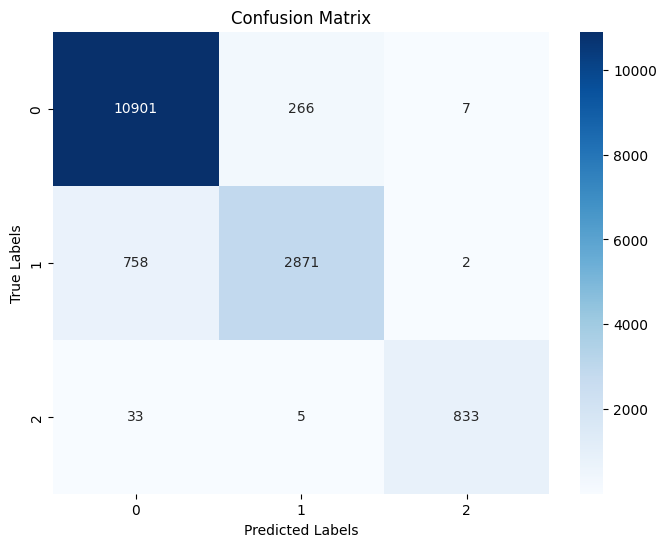

In [22]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [23]:

# Compute classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      Attack       0.93      0.98      0.95     11174
     Natural       0.91      0.79      0.85      3631
    NoEvents       0.99      0.96      0.97       871

    accuracy                           0.93     15676
   macro avg       0.95      0.91      0.92     15676
weighted avg       0.93      0.93      0.93     15676



In [24]:

# # Compute ROC curve and AUC
# y_proba = predictor.predict_proba(train_data.drop(['marker'], axis=1))
# fpr, tpr, _ = roc_curve(y_true, y_proba)
# roc_auc = auc(fpr, tpr)


In [25]:

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


In [26]:

# # Display other performance metrics in tabular form
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
#     'Score': [
#         performance['accuracy'],
#         performance['precision'],
#         performance['recall'],
#         performance['f1'],
#         roc_auc
#     ]
# })
# print("Performance Metrics:")
# print(metrics_df)

Save and Load the Trained Model

In [27]:
# Save the trained model to a specified directory
predictor.save('/home/danish/Codes/AutoML/Gluon2')

In [28]:
# Load the saved model from a specified directory
predictor = TabularPredictor.load('/home/danish/Codes/AutoML/Gluon2')

# Make predictions using the loaded model
predictions = predictor.predict(val_data)

In [29]:
predictor.feature_importance(val_data)

Computing feature importance via permutation shuffling for 73 features using 5000 rows with 5 shuffle sets...
	102.02s	= Expected runtime (20.4s per shuffle set)
	72.65s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
R3-PM2:V,0.07980,0.003050,2.554409e-07,5,0.086079,0.073521
R4-PM2:V,0.07504,0.002233,9.404811e-08,5,0.079639,0.070441
R3-PM1:V,0.07052,0.002411,1.636465e-07,5,0.075484,0.065556
R1-PM2:V,0.04724,0.003306,2.858859e-06,5,0.054047,0.040433
R2-PA:ZH,0.02652,0.002841,1.556799e-05,5,0.032370,0.020670
...,...,...,...,...,...,...
R2-PA4:IH,0.00088,0.001610,1.443594e-01,5,0.004195,-0.002435
R4-PA12:IH,0.00080,0.001543,1.553679e-01,5,0.003976,-0.002376
R2-PM6:I,0.00060,0.000678,5.952727e-02,5,0.001996,-0.000796
R4-PA11:IH,0.00036,0.001178,2.659801e-01,5,0.002786,-0.002066


In [30]:
val_data.columns

Index(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH',
       'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PM10:I', 'R1-PA11:IH',
       'R1-PA12:IH', 'R1-PA:ZH', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH',
       'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I',
       'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH',
       'R2-PM7:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PA12:IH',
       'R2-PA:ZH', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA10:IH', 'R3-PM10:I', 'R3-PA11:IH', 'R3-PA12:IH', 'R3-PA:ZH',
       'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH',
       'R4-PM3:V', 'R4-PM4:I', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH',
       'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PA10:IH', 'R4-PM10:I',
       'R4-PA1

In [31]:
train_data.columns == val_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [32]:
predictor.features()

['R1-PA1:VH',
 'R1-PM1:V',
 'R1-PA2:VH',
 'R1-PM2:V',
 'R1-PA3:VH',
 'R1-PM3:V',
 'R1-PM4:I',
 'R1-PA5:IH',
 'R1-PM5:I',
 'R1-PA6:IH',
 'R1-PM6:I',
 'R1-PA7:VH',
 'R1-PM7:V',
 'R1-PM10:I',
 'R1-PA11:IH',
 'R1-PA12:IH',
 'R1-PA:ZH',
 'R2-PA1:VH',
 'R2-PM1:V',
 'R2-PA2:VH',
 'R2-PM2:V',
 'R2-PA3:VH',
 'R2-PM3:V',
 'R2-PA4:IH',
 'R2-PM4:I',
 'R2-PA5:IH',
 'R2-PM5:I',
 'R2-PA6:IH',
 'R2-PM6:I',
 'R2-PA7:VH',
 'R2-PM7:V',
 'R2-PA10:IH',
 'R2-PM10:I',
 'R2-PA11:IH',
 'R2-PA12:IH',
 'R2-PA:ZH',
 'R3-PA1:VH',
 'R3-PM1:V',
 'R3-PA2:VH',
 'R3-PM2:V',
 'R3-PA3:VH',
 'R3-PM3:V',
 'R3-PA4:IH',
 'R3-PM4:I',
 'R3-PA5:IH',
 'R3-PM5:I',
 'R3-PA6:IH',
 'R3-PM6:I',
 'R3-PA7:VH',
 'R3-PM7:V',
 'R3-PA10:IH',
 'R3-PM10:I',
 'R3-PA11:IH',
 'R3-PA12:IH',
 'R3-PA:ZH',
 'R4-PA1:VH',
 'R4-PM1:V',
 'R4-PA2:VH',
 'R4-PM2:V',
 'R4-PA3:VH',
 'R4-PM3:V',
 'R4-PM4:I',
 'R4-PA5:IH',
 'R4-PM5:I',
 'R4-PA6:IH',
 'R4-PM6:I',
 'R4-PA7:VH',
 'R4-PM7:V',
 'R4-PA10:IH',
 'R4-PM10:I',
 'R4-PA11:IH',
 'R4-PA12:IH',
 'R4-PA:ZH']